# Student Feedback Satisfaction Analysis

## Project Overview
This project analyzes student feedback survey data to evaluate overall satisfaction levels and identify areas for improvement. The dataset contains numerical ratings collected from students across various feedback parameters.

The analysis is performed using Python in Google Colab. Key steps include data cleaning, computation of overall satisfaction scores, categorization of satisfaction levels, and visualization of insights to support data-driven decision making.

step 1: data loading and cleaning

In [29]:
import pandas as pd

df = pd.read_csv("student_feedback.csv")
df.head()

,Unnamed: 0,Student ID,Well versed with the subject,Explains concepts in an understandable way,Use of presentations,Degree of difficulty of assignments,Solves doubts willingly,Structuring of the course,Provides support for students going above and beyond,Course recommendation based on relevance
0,0,340,5,2,7,6,9,2,1,8
1,1,253,6,5,8,6,2,1,2,9
2,2,680,7,7,6,5,4,2,3,1
3,3,806,9,6,7,1,5,9,4,6
4,4,632,8,10,8,4,6,6,9,9


step 2 : check data summary

In [40]:
df.describe()

,Well versed with the subject,Explains concepts in an understandable way,Use of presentations,Degree of difficulty of assignments,Solves doubts willingly,Structuring of the course,Provides support for students going above and beyond,Course recommendation based on relevance,Overall_Satisfaction
count,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000
mean,7.497502,6.081918,5.942058,5.430569,5.474525,5.636364,5.662338,5.598402,5.915460
std,1.692998,2.597168,1.415853,2.869046,2.874648,2.920212,2.891690,2.886617,0.894734
min,5.000000,2.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.375000
25%,6.000000,4.000000,5.000000,3.000000,3.000000,3.000000,3.000000,3.000000,5.250000
50%,8.000000,6.000000,6.000000,5.000000,6.000000,6.000000,6.000000,6.000000,5.875000
75%,9.000000,8.000000,7.000000,8.000000,8.000000,8.000000,8.000000,8.000000,6.625000
max,10.000000,10.000000,8.000000,10.000000,10.000000,10.000000,10.000000,10.000000,8.250000


step 3: calculate overall satisfaction score

In [42]:
df["Overall_satisfaction"] = df.select_dtypes(include="number").mean(axis=1)

step 4: satisfaction distribution chart

In [27]:
rating_columns = [
    'Well versed with the subject',
    'Explains concepts in an understandable way',
    'Use of presentations',
    'Degree of difficulty of assignments',
    'Solves doubts willingly',
    'Structuring of the course',
    'Provides support for students going above and beyond',
    'Course recommendation based on relevance'
]

df['Overall_Satisfaction'] = df[rating_columns].mean(axis=1)

In [28]:
def satisfaction_level(score):
    if score >= 8:
        return 'High'
    elif score >= 6:
        return 'Medium'
    else:
        return 'Low'

In [29]:
df['Satisfaction_Level'] = df['Overall_Satisfaction'].apply(satisfaction_level)
df['Satisfaction_Level'].value_counts()

,count
Satisfaction_Level,
Low,533
Medium,456
High,12


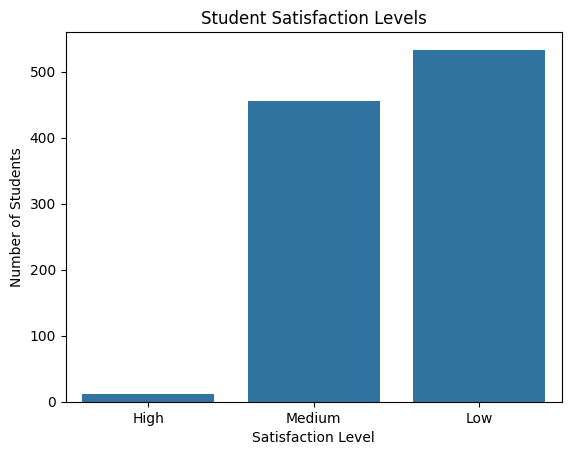

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Satisfaction_Level', data=df, order=['High','Medium','Low'])
plt.title("Student Satisfaction Levels")
plt.xlabel("Satisfaction Level")
plt.ylabel("Number of Students")
plt.show()

step 5: Question-Wise Average Ratings

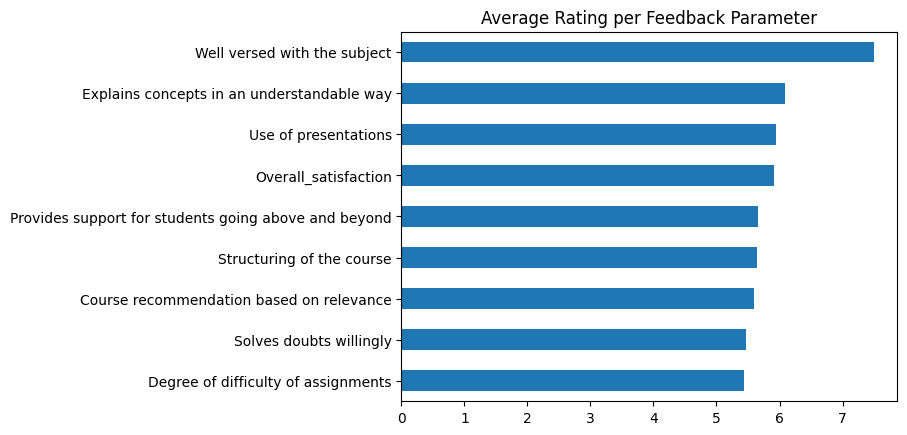

In [44]:
avg_scores = df.drop(columns=['Overall_Satisfaction', 'Satisfaction_Level']).mean()

avg_scores.sort_values().plot(kind='barh')
plt.title("Average Rating per Feedback Parameter")
plt.show()

step 6: Overall Satisfaction Distribution

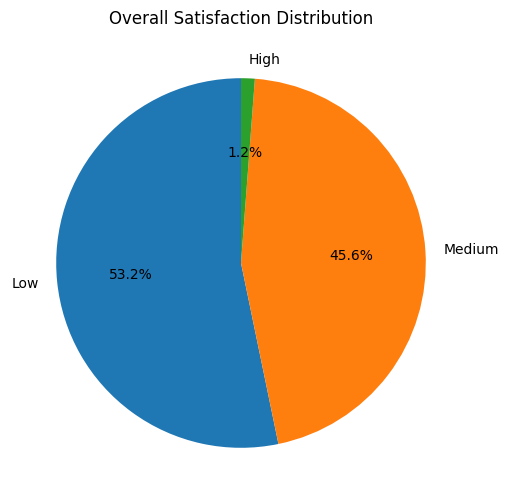

In [43]:
import matplotlib.pyplot as plt

satisfaction_counts = df['Satisfaction_Level'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(
    satisfaction_counts,
    labels=satisfaction_counts.index,
    autopct='%1.1f%%',
    startangle=90
)
plt.title("Overall Satisfaction Distribution")
plt.show()

Conclusion

This project successfully analyzed student feedback survey data to evaluate overall satisfaction levels and identify key strengths and areas for improvement. By performing data cleaning, calculating average satisfaction scores, categorizing satisfaction levels, and visualizing the results, meaningful insights were derived from the dataset.

The analysis shows that a majority of students fall under the Medium to High satisfaction categories, indicating that the overall quality of teaching, course structure, and student support is satisfactory. Parameters such as subject knowledge, clarity of explanation, and willingness to solve doubts received relatively higher ratings, highlighting strong academic engagement.